# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

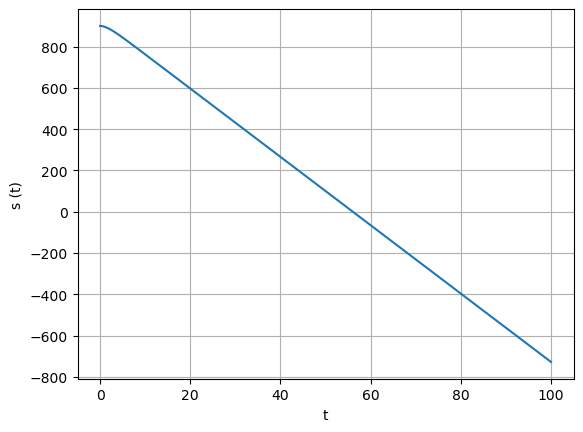

In [1]:
import numpy as np
import matplotlib.pyplot as plt



def s(t):
    s0=900
    m=0.25
    k = 0.148
    g =9.8
    return s0 - (m*g/k)*t + ((m**2)*g)/(k**2)*(1-np.exp(-k*t/m))

x_val = np.linspace(0,100,1000)

plt.plot(x_val,s(x_val))
plt.xlabel('t')
plt.ylabel('s (t)')
plt.grid()

In [2]:
from scipy import optimize
import sympy as sp


def g(t):     #definicion de la función punto fijo
    s0=900
    m=0.25
    k = 0.148
    g =9.8
    return (((m**2)*g)/(k**2)*(1-np.exp(-k*t/m))+s0)/(m*g/k)

print(optimize.bisect(s,40,100))
print(optimize.newton(s,40))

#-**********************************************************
#implementación por el método del punto fijo
x_ini=40
for i in range(1,10):

    x_sig = g(x_ini)
    x_ini = x_sig

print('Esta es la raiz por el metodo de punto fijo: ',x_ini)
#**************************************************************



56.05653612796516
56.056536127964684
Esta es la raiz por el metodo de punto fijo:  56.05653612796469


In [3]:
import sympy as sp
#******************************************
#implementación Metodo de newton

x = sp.Symbol('x')

s0=900
m=0.25
k = 0.148
g =9.8

f = s0 - (m*g/k)*x + ((m**2)*g)/(k**2)*(1-sp.exp(-k*x/m))
derivada = sp.diff(f,x)
x_ini=40
for i in range(1,100):
    x_sig = x_ini -f.subs(x,x_ini)/derivada.subs(x,x_ini)
    x_ini = x_sig
print('Esta es la raiz por el metodo de newton: ',x_ini)

#print(derivada)

#fin del metodo de newton
#***************************************************

Esta es la raiz por el metodo de newton:  56.0565361279647


In [4]:

masa=np.linspace(0.25,1,10)

for i in range masa:
    def  caida(t,m):
        s0=900
        k = 0.148
        g =9.8
        return s0 - (m*g/k)*t + ((m**2)*g)/(k**2)*(1-np.exp(-k*t/m))

        print(optimize.newton(caida,40))




SyntaxError: invalid syntax (1519832736.py, line 3)

In [5]:
import pandas as pd

df = pd.DataFrame

df =pd.read_csv("https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv")

df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [6]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
df.Weather

0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object

In [8]:
columnas = df.columns.tolist()
print(columnas)

['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


In [9]:
import pandas as pd


elementos_unicos = df['Weather'].unique()

print(elementos_unicos)


['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


In [10]:

filtro_cloudy = df['Weather'] == 'Cloudy'

resultado_filtrado = df[filtro_cloudy]
df2 = pd.DataFrame   #creando un dataframe para los valores filtrados
df2 = resultado_filtrado
print(resultado_filtrado)
print(df2)


            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
17     1/1/2012 17:00     3.0               0.0         81               13   
20     1/1/2012 20:00     3.2               1.3         87               19   
21     1/1/2012 21:00     4.0               1.7         85               20   
23     1/1/2012 23:00     5.3               2.0         79               30   
25      1/2/2012 1:00     4.6               0.0         72               39   
...               ...     ...               ...        ...              ...   
8761  12/31/2012 1:00   -10.7             -14.0         77               15   
8762  12/31/2012 2:00   -10.1             -13.4         77                9   
8764  12/31/2012 4:00   -10.5             -12.8         83               11   
8765  12/31/2012 5:00   -10.2             -12.4         84                6   
8766  12/31/2012 6:00    -9.7             -11.7         85                4   

      Visibility_km  Press_kPa Weather  
17        

In [11]:
df2

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy


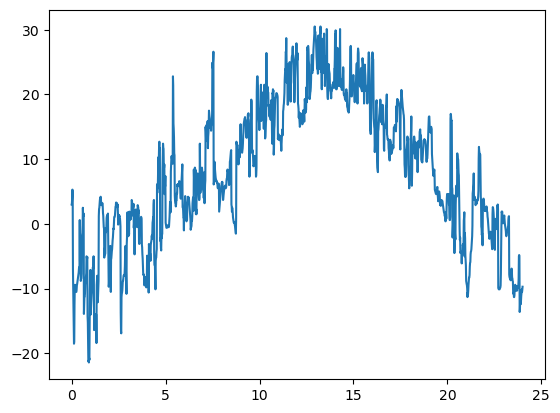

In [12]:


valores_tiempo = np.linspace(0,24,1728)
plt.plot(valores_tiempo,df2.Temp_C)


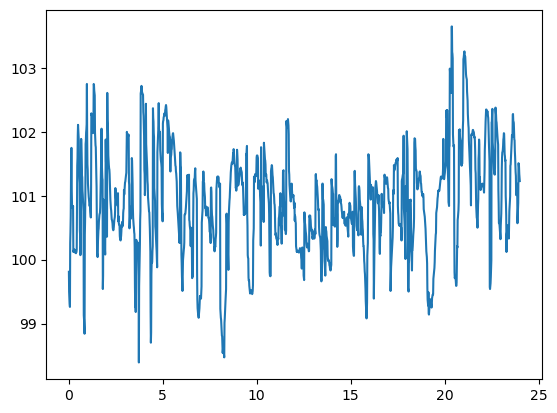

In [13]:
plt.plot(valores_tiempo,df2.Press_kPa)

In [14]:
df3= pd.DataFrame
df3 = df2
df3["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
df3

/var/folders/6s/h5hh29jn1dqd4r627s043vy40000gn/T/ipykernel_93869/790127586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,2012-01-01 17:00:00
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,2012-01-01 20:00:00
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,2012-01-01 21:00:00
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,2012-01-01 23:00:00
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy,2012-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy,2012-12-31 01:00:00
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,2012-12-31 02:00:00
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,2012-12-31 04:00:00
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,2012-12-31 05:00:00


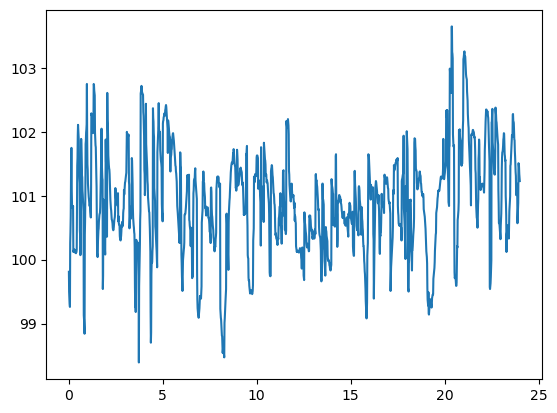

In [15]:
plt.plot(valores_tiempo,df3.Press_kPa)

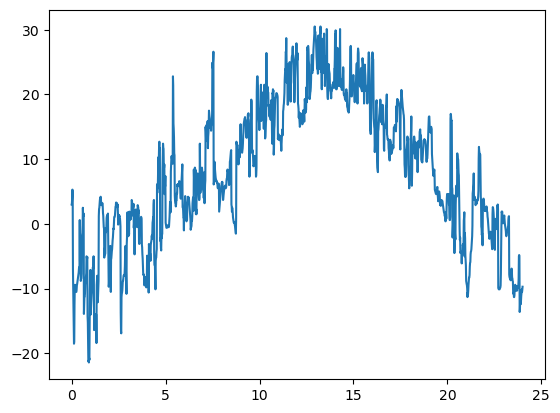

In [16]:
plt.plot(valores_tiempo,df3.Temp_C)